## Результаты измерений и обработка данных.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MNK

In [28]:
SN = 0.3 # м^2
d_I = 0.01 # погр I в А
d_phi = 0.01 # погр phi в мВб
data = {'phi, мВб': [0.35, 0.75, 1, 1.4, 1.65, 2, 2.3, 2.5, 3.1, 3.5, 3.8, 4, 4.35, 4.7, 5.2],                # phi(мВб) 
        'I, А': [0.35, 0.71, 0.91, 1.31, 1.60, 1.97, 2.19, 2.43, 2.94, 3.46, 3.59, 3.83, 4.16, 4.46, 4.89]} # I(A)
data['B, мТл'] = [phi/SN for phi in data['phi, мВб']] # B (мТл)
d_B = d_I/SN

df1 = pd.DataFrame(data)

Построим график  $B$ от $I$

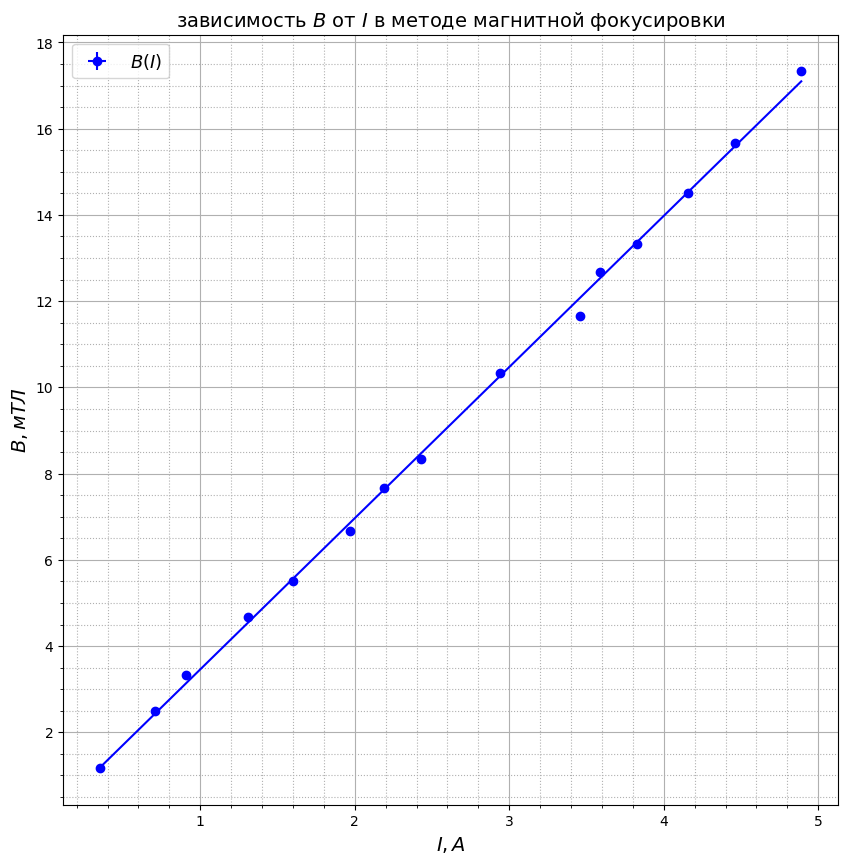

In [30]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_ylabel("$B, мТЛ$", fontsize=14)
ax.set_xlabel("$I, A$", fontsize=14)
ax.minorticks_on()
ax.set_title("зависимость $B$ от $I$ в методе магнитной фокусировки", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
k = MNK.MNK(data['I, А'], data['B, мТл'], [d_I]*len(data['I, А']), [d_B]*len(data['I, А']), ax, '$B(I)$', 'b')
ax.legend(fontsize = 13)

Выпишем в отдельную функцию B(I) и ее погрешность

In [31]:
B = lambda i: (k[0]*i + k[1], ( (k[0]*i*((d_I/i)**2 + (k[-1]/k[0]))**0.5)**2 + k[3]**2)**0.5)

$I_\phi$ от $V$

In [32]:
data['I_phi_1'] = [0.66, 1.36, 2.06, 2.73, 3.35, 3.95, 4.58]
data['I_phi_2'] = [0.66, 1.31, 2.01, 2.73, 3.34, 3.91, 4.52]

Запишем так же параметры установки $V$ и $l$

In [33]:
V = 0.65 * 10**3 # В
l = 26.5*10**-2 # м

Построим графики зависимости $B$ от $n$, и найдем $\left(\frac{n}{B}\right)^2$

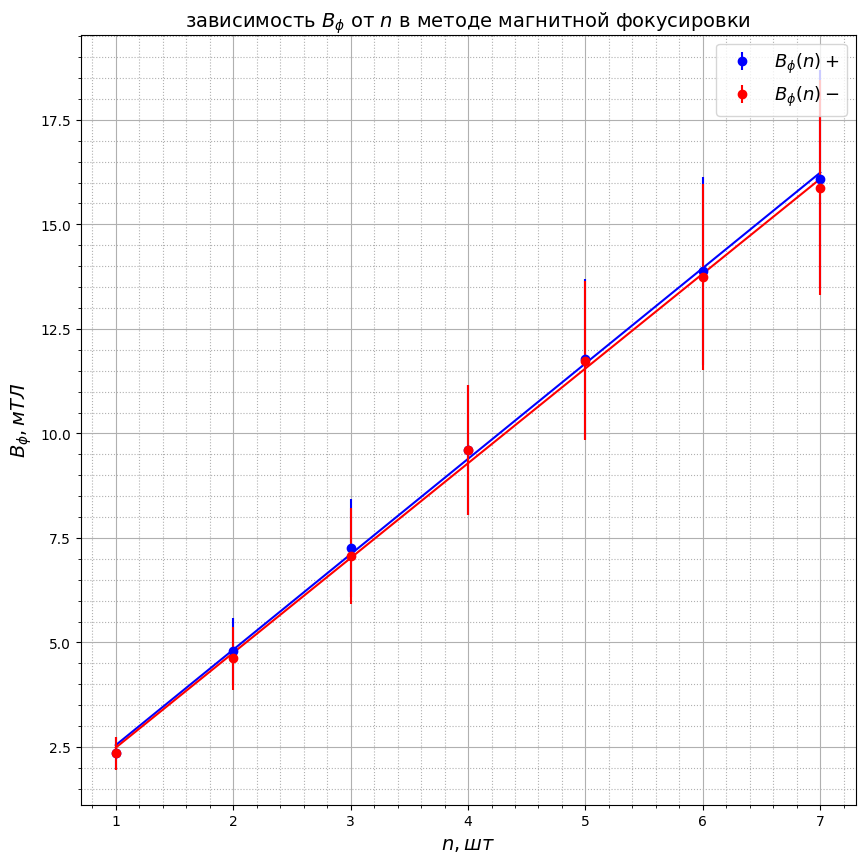

In [34]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$B_\phi, мТЛ$", fontsize=14)
fig.set_xlabel("$n, шт$", fontsize=14)
fig.minorticks_on()
fig.set_title("зависимость $B_\phi$ от $n$ в методе магнитной фокусировки", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
k1 = [0, 0]
k1[0] = MNK.MNK(list(range(1, len(data['I_phi_1'])+1)), [B(i)[0] for i in data['I_phi_1']], None, [B(i)[1] for i in data['I_phi_1']], fig, '$B_\phi(n) +$', 'b')
k1[1] = MNK.MNK(list(range(1, len(data['I_phi_2'])+1)), [B(i)[0] for i in data['I_phi_2']], None, [B(i)[1] for i in data['I_phi_2']], fig, '$B_\phi(n) -$', 'r')

fig.legend(fontsize = 13)

запишем $n/B$ для обоих графиков

In [35]:
nb1 = 1/k1[0][0]
nb2 = 1/k1[1][0]

используя формулу


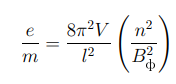

где $V$ - ускоряющий потенциал в электронной трубке, $l$ - путь электрона, $B_\phi$ - фокусирующее поле, $n$ - номер фокуса

расчитаем значения $\frac{e}{m}$ и сравним с табличными ($1.76 * 10^{11}Кл/Кг$)

In [36]:
em1 = ( (8*np.pi**2*V)/l**2) * nb1**2
em2 = ( (8*np.pi**2*V)/l**2) * nb2**2

In [37]:
print(f'$$\\frac {{e}}{{m}} = {em1/100000:.1f} \\pm { em1*(2*(k1[0][1]))**0.5/100000:.1f} (\epsilon = {100-em1/100000/1.76*100:.2f}%)$$')
print(f'$$\\frac {{e}}{{m}} = {em2/100000:.1f} \\pm { em2*(2*(k1[1][1]))**0.5/100000:.1f} (\epsilon = {100-em2/100000/1.76*100:.2f}%)$$')

$$\frac {e}{m} = 1.4 \pm 0.4 (\epsilon = 20.30%)$$
$$\frac {e}{m} = 1.4 \pm 0.4 (\epsilon = 19.24%)$$


$$\frac {e}{m} = 1.4 \pm 0.4  Кл/Кг(\varepsilon = 20.30\%)$$
$$\frac {e}{m} = 1.4 \pm 0.4  Кл/Кг(\varepsilon = 19.24\%)$$

# Метод магнетрона

измерим для разных $V_a$ анодный ток, от тока через соленоид

In [38]:
K = 3.5 * 10**-2 #Т/А|  коэф для I_m в B
r_a = 12 * 10**-4 #м

In [39]:
data = {70:{'i_a':[290, 285, 280, 280, 275, 260, 220, 90, 60, 40, 20, 10, 8, 6, 1, 0, 180], 
            'i_m':[0, 0.04, 0.076, 0.12, 0.124, 0.128, 0.13, 0.132, 0.134, 0.136, 0.14, 0.144, 0.152, 0.156, 0.18, 0.2, 0.131]
        },
        80:{
            'i_a':[280, 280, 280, 274, 264, 208, 56, 70, 30, 10, 8, 6, 0],
            'i_m':[0, 0.112, 0.06, 0.128, 0.136, 0.14, 0.144, 0.142, 0.148, 0.156, 0.16, 0.164, 0.2]
        },
        100:{
            'i_a':[290, 290, 290, 290, 286, 210, 40, 60, 84, 10, 3, 0],
            'i_m':[0, 0.052, 0.1, 0.12, 0.136, 0.156, 0.164, 0.16, 0.158, 0.18, 0.196, 0.236]
        },
        120:{
            'i_a':[290, 290, 290, 280, 280, 135, 58, 34, 16, 2, 0],
            'i_m':[0, 0.05, 0.1, 0.16, 0.168, 0.172, 0.176, 0.18, 0.188, 0.232, 0.29]
        },
        90:{
            'i_a':[230, 230, 230, 230, 230, 224, 160, 28, 50, 10, 3, 0],
            'i_m':[0, 0.005, 0.1, 0.116, 0.124, 0.136, 0.148, 0.156, 0.152, 0.168, 0.188, 0.23]
        }
       }
# B(мТл)

In [40]:
for i in data:
    data[i]['i_a'] = sorted(data[i]['i_a'])[::-1]
    data[i]['i_m'] = sorted(data[i]['i_m'])

In [41]:
for dat in data:
    data[dat]['B'] = [round(i * K * 1000, 3) for i in data[dat]['i_m']]

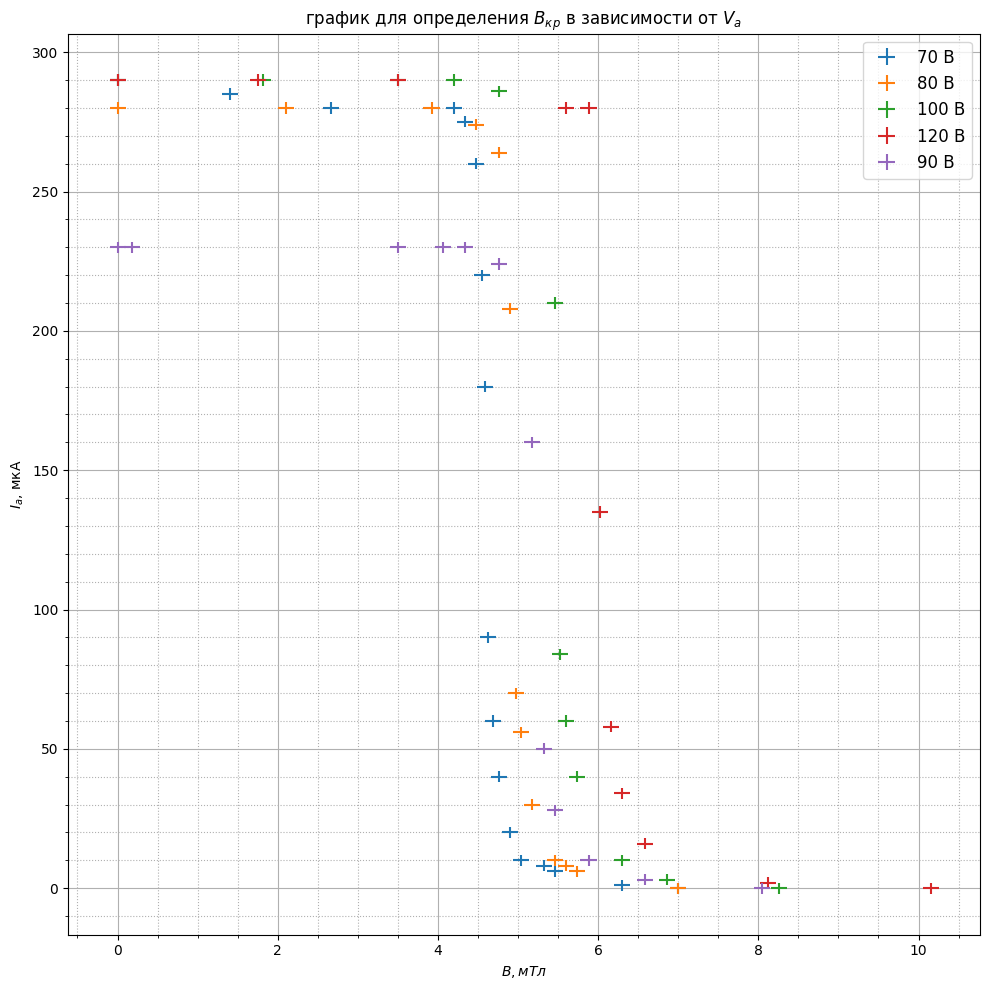

In [42]:
a = 10
plt.figure(figsize=(a, a))
plt.title("график для определения $B_{кр}$ в зависимости от $V_a$")
plt.ylabel("$I_a$, мкА")
plt.xlabel("$B, мТл$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

for dat, N in zip(data.values(), data.keys()):
    plt.errorbar(dat['B'], dat['i_a'], [2]*len(dat['B']), [0.1]*len(dat['B']), label = str(N) + ' В', linestyle = '')
    
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

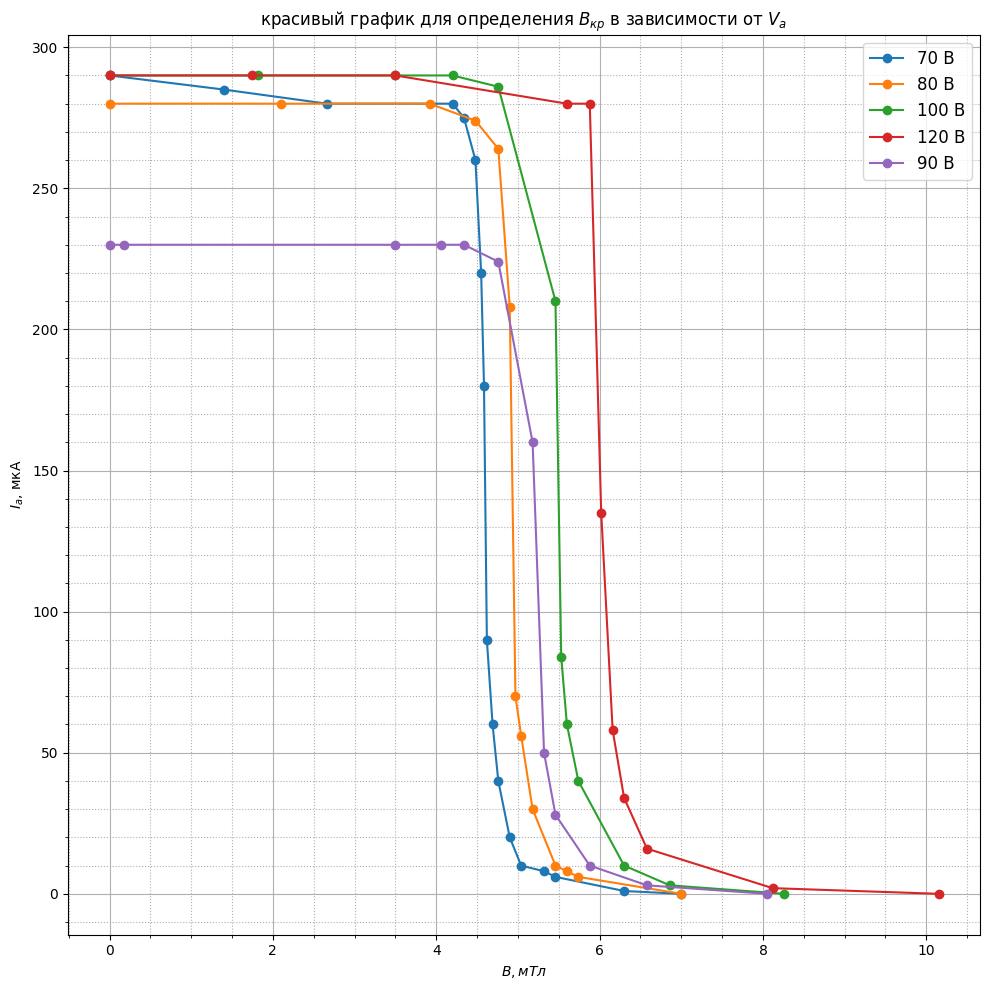

In [43]:
a = 10
plt.figure(figsize=(a, a))
plt.title("красивый график для определения $B_{кр}$ в зависимости от $V_a$")
plt.ylabel("$I_a$, мкА")
plt.xlabel("$B, мТл$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

for dat, N in zip(data.values(), data.keys()):
    plt.plot(dat['B'], dat['i_a'], '-o', label = str(N) + ' В')
    
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

In [44]:
n_of_B_kr = [8, 6, 6, 6, 7]
b_kr = []
b_kr_err = []
v_kr = []
for n, v in zip(n_of_B_kr, data.keys()):
        v_kr.append(v)
        b_kr.append((data[v]['B'][n]/1000)**2 * 10**5)
        b_kr_err.append((data[v]['B'][n]/1000)**2 * ((0.1/data[v]['B'][n]*2)**2)**0.5 * 10**5)
v_kr.sort()
b_kr.sort()
b_kr_err.sort()


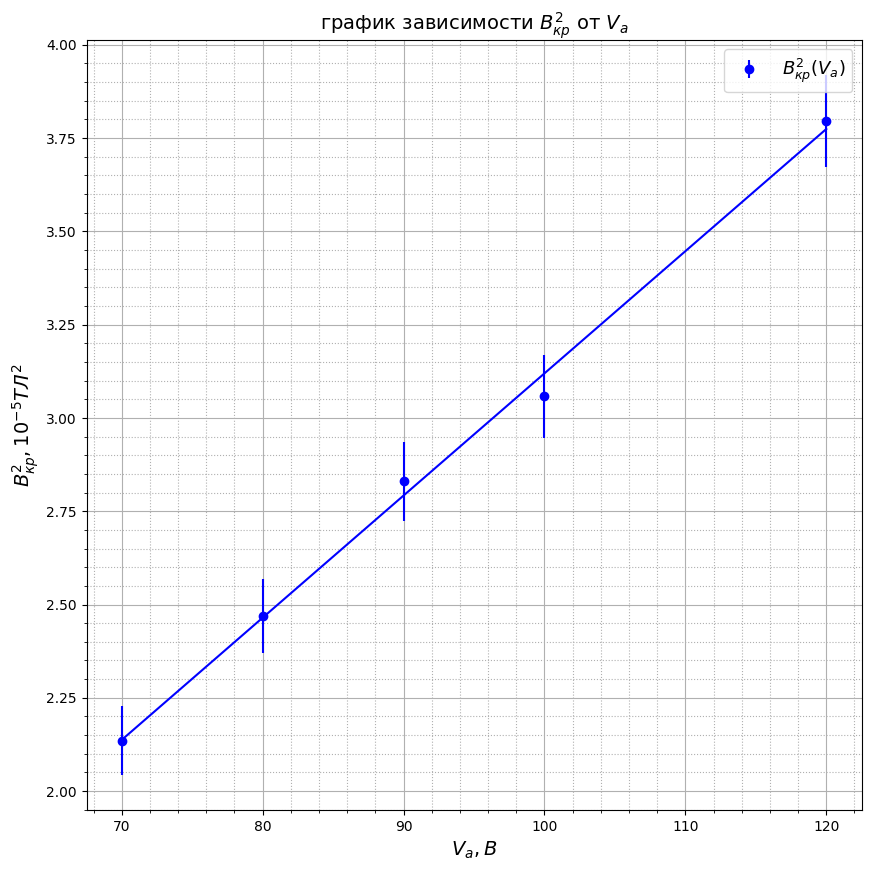

In [45]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$B^{2}_{кр},10^{-5} ТЛ^2$", fontsize=14)
fig.set_xlabel("$V_a, B$", fontsize=14)
fig.minorticks_on()
fig.set_title("график зависимости $B^{2}_{кр}$ от $V_a$", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

G = MNK.MNK(v_kr, b_kr, None, b_kr_err, fig, lab = '$B^{2}_{кр}(V_a)$', color = 'b')

fig.legend(fontsize = 13)

$$ \frac{e}{m} = \frac{8V_a}{B^{2}_{кр}r^{2}_{a}} $$

In [46]:
em = (8/r_a**2) * k[0]**-1 * 10**-6

In [47]:
print(f'$$\frac {{e}}{{m}} = {em:.1f} \\pm { (8/(r_a*100)**2)*(G[1]):.1f} (\\varepsilon = {100-em/1.76*100:.2f}\\%)$$')

$$rac {e}{m} = 1.6 \pm 0.6 (\varepsilon = 9.96\%)$$


$$\frac {e}{m} = 1.6 \pm 0.6 (\varepsilon = 9.96\%)$$